# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


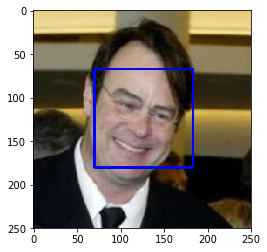

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [17]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
98% of the first 100 images in human_files have a detected human face and 17% of the first 100 images in dog_files have a detected human face.

 54%|█████▍    | 54/100 [00:01<00:01, 30.72it/s]

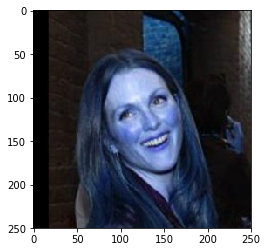

 85%|████████▌ | 85/100 [00:03<00:00, 26.22it/s]

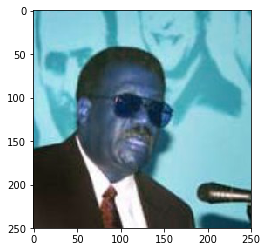

 26%|██▌       | 26/100 [00:06<00:12,  6.10it/s]

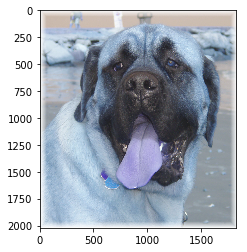

 27%|██▋       | 27/100 [00:07<00:43,  1.66it/s]

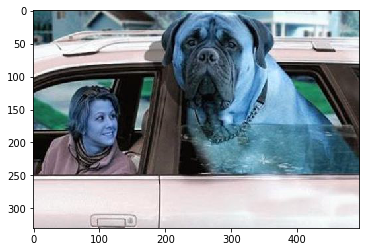

 39%|███▉      | 39/100 [00:12<00:23,  2.62it/s]

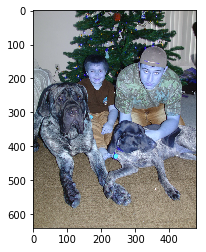

 40%|████      | 40/100 [00:12<00:24,  2.43it/s]

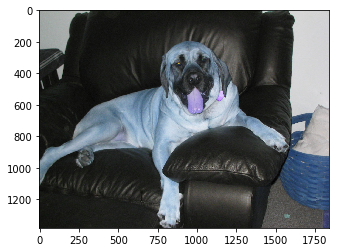

 42%|████▏     | 42/100 [00:13<00:29,  1.95it/s]

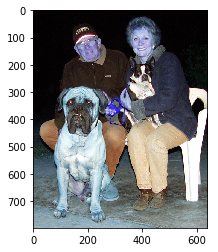

 49%|████▉     | 49/100 [00:15<00:12,  4.13it/s]

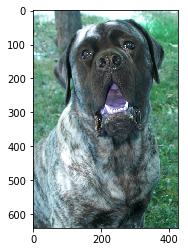

 55%|█████▌    | 55/100 [00:16<00:08,  5.44it/s]

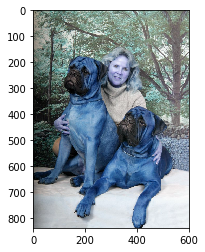

 57%|█████▋    | 57/100 [00:17<00:09,  4.36it/s]

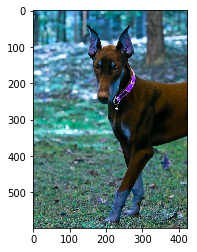

 59%|█████▉    | 59/100 [00:18<00:09,  4.17it/s]

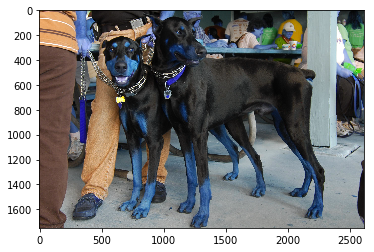

 70%|███████   | 70/100 [00:22<00:05,  5.01it/s]

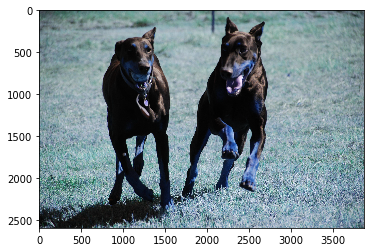

 77%|███████▋  | 77/100 [00:28<00:08,  2.72it/s]

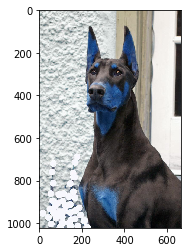

 78%|███████▊  | 78/100 [00:29<00:10,  2.15it/s]

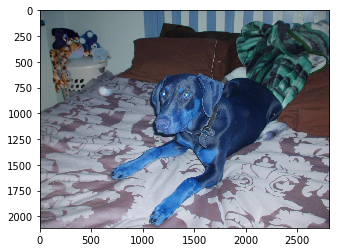

 84%|████████▍ | 84/100 [00:33<00:05,  2.74it/s]

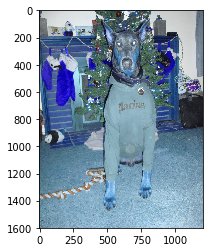

 88%|████████▊ | 88/100 [00:34<00:04,  2.62it/s]

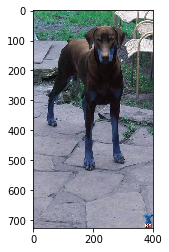

 89%|████████▉ | 89/100 [00:35<00:04,  2.50it/s]

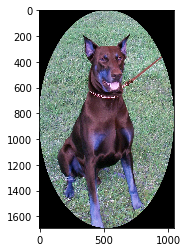

 90%|█████████ | 90/100 [00:36<00:06,  1.50it/s]

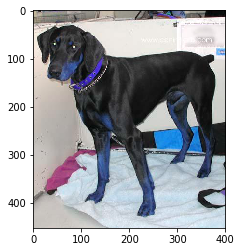

 94%|█████████▍| 94/100 [00:37<00:02,  2.85it/s]

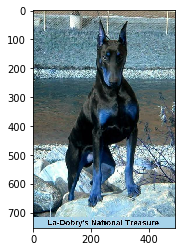

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]

98.0%
17.0%


In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
number_of_human_pictures_with_face = 0

for human_file in tqdm(human_files_short):
    if face_detector(human_file):
        number_of_human_pictures_with_face += 1
    else:
        img = cv2.imread(human_file)
        plt.imshow(img)
        plt.show()
        

average_human_pic_with_face = number_of_human_pictures_with_face/len(human_files_short)

number_of_dog_pictures_with_face = 0

for dog_file in tqdm(dog_files_short):
    if face_detector(dog_file):
        number_of_dog_pictures_with_face += 1
        img = cv2.imread(dog_file)
        plt.imshow(img)
        plt.show()
        

average_dog_pic_with_face = number_of_dog_pictures_with_face/len(dog_files_short)


print('{}%'.format(100*average_human_pic_with_face))
print('{}%'.format(100*average_dog_pic_with_face))

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 92593454.50it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms


def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    VGG16.eval()
    
    image = Image.open(img_path).convert('RGB')
    
    
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
    
    
    
    input_data = transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        input_data = input_data.to('cuda')
    
    prediction_tensor = VGG16(input_data)
    
    _ , predicted_class = torch.topk(prediction_tensor,1)
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return predicted_class # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    dog_bool = (VGG16_predict(img_path) >= 151 and VGG16_predict(img_path) <= 268)
    
    return  dog_bool # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
0% percent of all the images in human_files_short have a detected dog and 100% of the images in dog_files_short have a detected dog.

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
number_of_human_pictures_with_dog = 0

for human_file in tqdm(human_files_short):
    if dog_detector(human_file):
        number_of_human_pictures_with_dog += 1
        img = cv2.imread(human_file)
        plt.imshow(img)
        plt.show()
        
average_human_pic_with_dog = number_of_human_pictures_with_dog/len(human_files_short)
        
number_of_dog_pictures_with_dog = 0
        
for dog_file in tqdm(dog_files_short):
    if dog_detector(dog_file):
        number_of_dog_pictures_with_dog += 1
    else:
        img = cv2.imread(dog_file)
        plt.imshow(img)
        plt.show()
        
average_dog_pic_with_dog = number_of_dog_pictures_with_dog/len(dog_files_short)
        
print('{}%'.format(100*average_human_pic_with_dog))
print('{}%'.format(100*average_dog_pic_with_dog))

100%|██████████| 100/100 [00:09<00:00, 10.41it/s]

0.0%
100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [6]:
import os
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

transform_train = transforms.Compose([transforms.Resize(256),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.RandomCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

transform_test = transforms.Compose([transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = datasets.DatasetFolder('/data/dog_images/train', loader = Image.open, extensions = ['.jpg'], transform = transform_train)
valid_data = datasets.DatasetFolder('/data/dog_images/valid', loader = Image.open, extensions = ['.jpg'], transform = transform_train)
test_data = datasets.DatasetFolder('/data/dog_images/test', loader = Image.open, extensions = ['.jpg'], transform = transform_test)


train_sampler = SubsetRandomSampler(list(range(len(train_data))))
valid_sampler = SubsetRandomSampler(list(range(len(valid_data))))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
Firstly, with .Resize(256), the picture gets resized in a way such that the smaller side becomes 256 pixels large and the ratio between height and width stays the same as before. After that this resized picture gets cropped such that only the central 224x224 pixels remain; this is done via .CenterCrop(224). Therefore the size of the input tensor is 20x3x224x224, where 20 is the batch size, the 3 corresponds to the three color channels "blue", "green" and "red" and the last two dimensions (224x224) correspond to the height and width of the resized and cropped input images.
The size of the input was chosen analogously to the training input of the VGG16-network (as described in the chapter 3.1 "Training" of the research article "Very deep convolutional networks for large-scale image recognition" by Simonyan and Zisserman). The reason for this is twofold: Firstly, the task of "model_scratch" is an image classification; as was the task of VGG16 when it was trained. Therefore it makes sense to orient yourself by the size of the input the authors chose for training VGG16 (also, because by resizing to 256 and then cropping to 224x224 not too much information is lost from our images since they are not too big). Secondly, I wanted to use the same data loaders below where parts of the pre-trained VGG16-network are used; for this it is natural to choose the same input size as the one used while training VGG16. 

Yes, I augmented the dataset. After resizing (and before cropping) the images get first flipped at an horizontal axis (with a probability of 50%) and then rotated. The rotation angle is randomly chosen from the range between -10 and 10 degrees.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,9,3,padding=1)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(9,16,3,padding=1)
        self.maxpool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(16,32,3,padding=1)
        self.maxpool3 = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(32*28*28,5000)
        self.fc2 = nn.Linear(5000,1000)
        self.fc3 = nn.Linear(1000,133)
        
        self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.conv1(x)
        x = self.dropout(F.relu(self.maxpool1(x)))
        x = self.conv2(x)
        x = self.dropout(F.relu(self.maxpool2(x)))
        x = self.conv3(x)
        x = self.dropout(F.relu(self.maxpool3(x)))
        x = x.view(-1,32*28*28)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x),dim = 1)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
Firstly, I tried to find research papers online which deal with a similar task as classifying dog breeds with the help of a neural network. I found the paper "Sheep identification using a hybrid deep learning and Bayesian optimization approach" by Salama, Hassanien and Fahmy. In that article the authors tried (amongst other things) to identify sheep breeds by inputting pictures of sheeps into a deep CNN. In chapter V. "Experimental results and evaluation" they describe the architecture of their CNN as consisting of three convolutional layers respectively followed by a ReLU- and a maxpooling layer. Furthermore they installed 10 fully connected layers at the end of their network. 
After I found that article I tried to use the same architecture (with the adjusted output size of 133 classes for our 133 different dog breeds and other little adjustments of the size of the network layers) for the dog breed indentification but got an "out of memory"-error. Because of this I reduced the number of fully connected layers drastically to three, but kept the number of three convolutional layers.

To prevent overfitting I included several dropout layers. Furthermore, since the neural network is used for a classification task, I chose the Cross-Entropy-Loss function. For that I included the application of the log_softmax-function to the output of the network into the Net() class and set the "criterion" loss function to NLLLoss(). This is because the Cross-Entropy-Loss function is the combination of the log_softmax and the negative log-likelihood-loss function.

With this architecture I let the model run for 30 epochs and got an accuracy of around 13% in our test-dataset.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [8]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.01,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss_train_batch = criterion(output,target)
            loss_train_batch.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss_train_batch.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output_valid = model(data)
                loss_valid_batch = criterion(output_valid,target)
                valid_loss = valid_loss+((1/(batch_idx + 1))*(loss_valid_batch.data-valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(),save_path)
            print('Model saved.')
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.872465 	Validation Loss: 4.805848
Model saved.
Epoch: 2 	Training Loss: 4.731444 	Validation Loss: 4.666434
Model saved.
Epoch: 3 	Training Loss: 4.630727 	Validation Loss: 4.665454
Model saved.
Epoch: 4 	Training Loss: 4.478054 	Validation Loss: 4.443471
Model saved.
Epoch: 5 	Training Loss: 4.387973 	Validation Loss: 4.342279
Model saved.
Epoch: 6 	Training Loss: 4.324338 	Validation Loss: 4.497804
Epoch: 7 	Training Loss: 4.265178 	Validation Loss: 4.097235
Model saved.
Epoch: 8 	Training Loss: 4.196047 	Validation Loss: 4.097329
Epoch: 9 	Training Loss: 4.140873 	Validation Loss: 4.052096
Model saved.
Epoch: 10 	Training Loss: 4.074837 	Validation Loss: 3.966152
Model saved.
Epoch: 11 	Training Loss: 3.993880 	Validation Loss: 3.876621
Model saved.
Epoch: 12 	Training Loss: 3.943720 	Validation Loss: 3.742834
Model saved.
Epoch: 13 	Training Loss: 3.864325 	Validation Loss: 3.795082
Epoch: 14 	Training Loss: 3.794581 	Validation Loss: 3.798625
Epoch: 15 	

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function  
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.828722


Test Accuracy: 13% (109/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [10]:
## TODO: Specify data loaders
batch_size = 20
num_workers = 0

transform_train = transforms.Compose([transforms.Resize(256),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.RandomCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

transform_test = transforms.Compose([transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_data = datasets.DatasetFolder('/data/dog_images/train', loader = Image.open, extensions = ['.jpg'], transform = transform_train)
valid_data = datasets.DatasetFolder('/data/dog_images/valid', loader = Image.open, extensions = ['.jpg'], transform = transform_train)
test_data = datasets.DatasetFolder('/data/dog_images/test', loader = Image.open, extensions = ['.jpg'], transform = transform_test)


train_sampler = SubsetRandomSampler(list(range(len(train_data))))
valid_sampler = SubsetRandomSampler(list(range(len(valid_data))))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torchvision.models as models
import torch.nn as nn


    
model_transfer = VGG16
    
model_transfer.classifier[6] = nn.Linear(4096,133)

for param in model_transfer.features.parameters():
    param.requires_grad = False

## TODO: Specify model architecture 


if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

# Load VGG16 again since the dog_detector function needs "VGG16" and not the new architecture of "model_transfer".
VGG16 = models.vgg16(pretrained=True)

if use_cuda:
    VGG16.cuda()

VGG16    

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
We have learned in the lesson on transfer learning that the filters in the first convolutional layers of a deep CNN, which was trained on a large dataset consisting of images, are very useful to detect general image-features. Therefore we can leave the parameters in those convolutional layers as they are since they will most likely be very helpful in all kinds of image classification tasks. We have also learned that the filters in the final layers of a deep CNN are way more specific to the concrete dataset they were trained on. If we want to use a pre-trained deep CNN for a new classification task we should therefore let the network update the parameters in those final layers while training.
Because of these two things I chose the architecture to be the following: I didn't change any layer from the "features"-part of VGG16. Furthermore I set param.requires_grad to "False" for all the parameters from those layers since I wanted to have the same parameters for those layers as in the trained VGG16-network. In the "classifier"-part of VGG16 I changed the last fully-connected layer to a layer with 133 outputs since we have 133 different classes in our classification problem (and not 1000). While training I let the network update all the parameters in the "classifier"-part. This I did to let the network learn about dog breed classification. A task it was not originally trained for.

With this architecture the pre-trained "features"-part of our new model_transfer should help detecting more general features (as for examples colors or simple shapes as lines and circles). The newly trained "classifier"-part of model_transfer on the other hand will then use this knowledge about the general features to solve the more specific task of dog breed classification.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [12]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss_train_batch = criterion(output,target)
            loss_train_batch.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss_train_batch.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                output_valid = model(data)
                loss_valid_batch = criterion(output_valid,target)
                valid_loss = valid_loss+((1/(batch_idx + 1))*(loss_valid_batch.data-valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(),save_path)
            print('Model saved.')
            valid_loss_min = valid_loss
    # return trained model
    return model

In [23]:
# train the model
n_epochs = 8
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.128477 	Validation Loss: 2.933830
Model saved.
Epoch: 2 	Training Loss: 2.330849 	Validation Loss: 1.445276
Model saved.
Epoch: 3 	Training Loss: 1.482320 	Validation Loss: 0.971936
Model saved.
Epoch: 4 	Training Loss: 1.166558 	Validation Loss: 0.792915
Model saved.
Epoch: 5 	Training Loss: 0.994526 	Validation Loss: 0.684689
Model saved.
Epoch: 6 	Training Loss: 0.905759 	Validation Loss: 0.610102
Model saved.
Epoch: 7 	Training Loss: 0.845051 	Validation Loss: 0.559323
Model saved.
Epoch: 8 	Training Loss: 0.786800 	Validation Loss: 0.530995
Model saved.


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [13]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.583387


Test Accuracy: 82% (687/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.eval()
    
    image = Image.open(img_path).convert('RGB')
    
    
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5),
                                    (0.5, 0.5, 0.5))])
    
    
    
    input_data = transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        input_data = input_data.to('cuda')
    
    prediction_tensor = model_transfer(input_data)
    
    _ , predicted_class = torch.topk(prediction_tensor,1)
    
    dog_breed = class_names[predicted_class]
    
    return dog_breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [15]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        print('The picture shows a dog.\n')
        
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.show()
        
        print('The dog\'s breed seems to be {}.'.format(predict_breed_transfer(img_path)))
        
    elif face_detector(img_path):
        print('The picture shows a person.\n')
        
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.show()        
        
        print('The person looks like a {} :).'.format(predict_breed_transfer(img_path)))
        
    else:
        print('Please just input pictures of dogs and humans!')
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.show() 
        


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The face detector is maybe not as well working as one might hope for. It doesn't recognize faces on some images which clearly show a person. And on the other hand it sometimes detects a face on images that clearly don't show a person (as in the picture with the plant below).

But the dog breed classifier is actually working quite well, even though this classification is a rather hard task.

-Therefore the 1st point I would try to improve is the face detector function. My (maybe naive) strategy for improvement would be to train a neural network for this where the training data is heavily augmented; because it seems to me that the pictures of persons where our face detector from above fails are mostly pictures in which the person's head is turned to the side (or even turned upside down as in one of the pictures below).

-Even though the dog breed classifier already works quite well, an accuracy of 82 percent is not optimal. The 2nd point of improvement that I would suggest, is therefore the following: I would try to train "model_transfer" for more than 8 epochs to get an accuracy of more than 82 percent. I am optimistic that this would work since the validation loss of "model_transfer" decreased at every epoch during the training above. That means that the model isn't overfitted to the training data set yet and can get trained longer.

-If one looks at the site of the fci (http://www.fci.be/en/Nomenclature/) one sees that there are more than 360 officially listed dog breeds which is almost three times as much much as our 133 classes. This is problematic because a dog breed classifier should have all existing breeds on the list and not just a third of them. Therefore a 3rd thing one could improve would be: Train a network with the number of output nodes equal to the number of all dog breeds and ofcourse feed the network with images of all those breeds while training.

-The dog detector function checks if one of the 118 dog breeds that VGG16 knows (these are the classes 151-168 in ImageNet) is detected by VGG16 on an image. Our dog detector functions says that there is a dog on the image if and only if VGG16 does recognize one of those 118 breeds. But as already said above there are way more than 118 dog breeds. Therefore the dog dectector function could miss an image with a dog just because the dog that is shown in the image doesn't belong to one of those 118 breeds. This is the 4th that one could improve. 

Please just input pictures of dogs and humans!


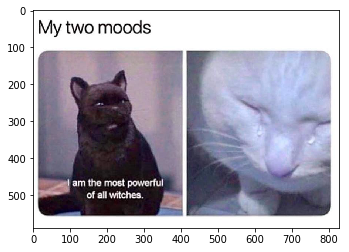

Please just input pictures of dogs and humans!


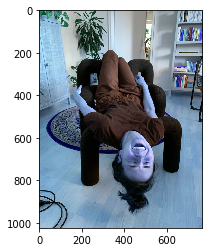

The picture shows a person.



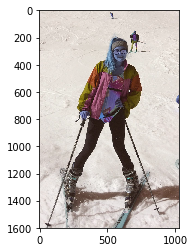

The person looks like a Komondor :).
The picture shows a person.



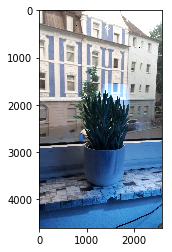

The person looks like a Chinese crested :).
The picture shows a person.



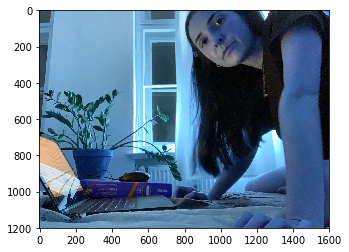

The person looks like a Chinese crested :).
The picture shows a person.



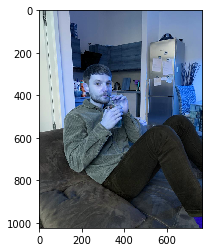

The person looks like a Nova scotia duck tolling retriever :).
The picture shows a dog.



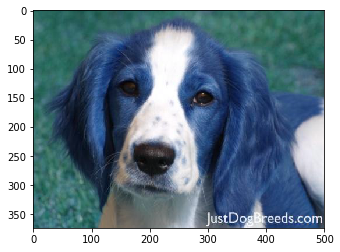

The dog's breed seems to be Welsh springer spaniel.
The picture shows a dog.



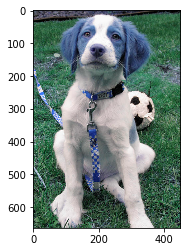

The dog's breed seems to be Brittany.
The picture shows a dog.



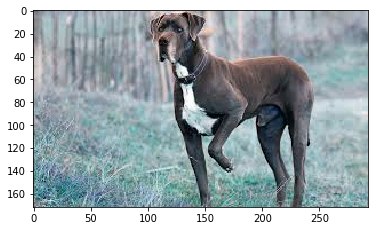

The dog's breed seems to be Great dane.
The picture shows a dog.



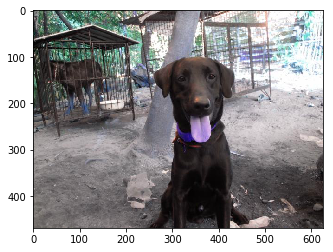

The dog's breed seems to be Labrador retriever.
The picture shows a person.



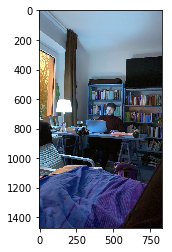

The person looks like a Chinese crested :).
The picture shows a dog.



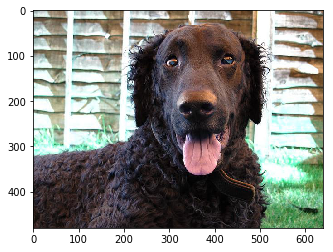

The dog's breed seems to be Curly-coated retriever.
Please just input pictures of dogs and humans!


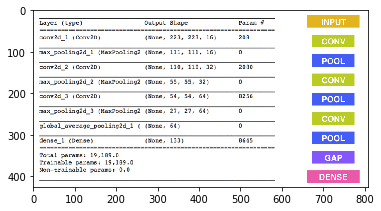

The picture shows a dog.



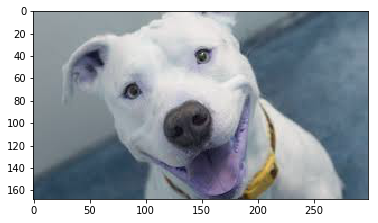

The dog's breed seems to be American staffordshire terrier.
The picture shows a dog.



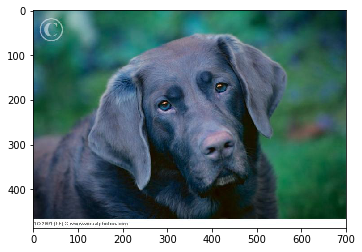

The dog's breed seems to be Labrador retriever.
The picture shows a person.



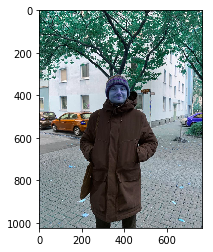

The person looks like a Poodle :).
The picture shows a dog.



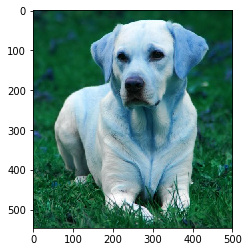

The dog's breed seems to be Labrador retriever.
The picture shows a dog.



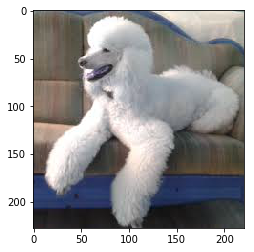

The dog's breed seems to be Poodle.
The picture shows a dog.



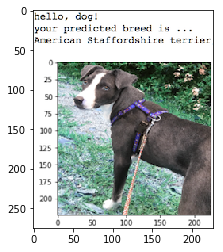

The dog's breed seems to be Italian greyhound.
The picture shows a person.



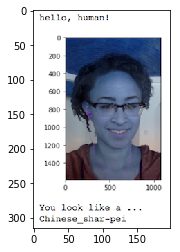

The person looks like a Dachshund :).
The picture shows a person.



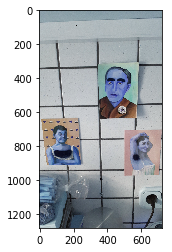

The person looks like a Chihuahua :).
Please just input pictures of dogs and humans!


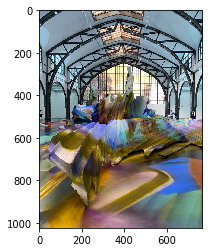

The picture shows a dog.



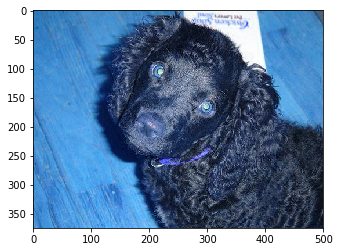

The dog's breed seems to be Curly-coated retriever.
Please just input pictures of dogs and humans!


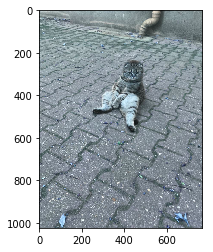

In [19]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below


for file in np.array(glob("images/*")):
    run_app(file)